## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_flights = pd.read_csv('data/flights.csv')

In [ ]:
df_fuel_comsumption = pd.read_csv('data/fuel_comsumption.csv')
df_fuel_comsumption.head()

In [ ]:
df_passengers = pd.read_csv('data/passengers.csv')
df_passengers.head()

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

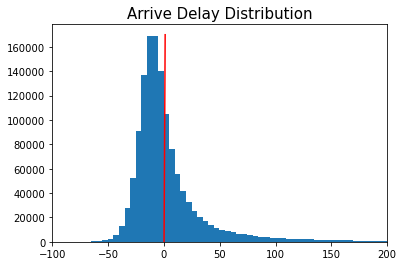

In [4]:
plt.hist(df_flights['arr_delay'], bins=500)
plt.xlim(-100, 200)
plt.title("Arrive Delay Distribution", size=15)
plt.plot([0, 170000], color='red')
plt.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
#should get data for a year

In [8]:
df_flights['month'] = pd.to_datetime(df_flights['fl_date']).dt.month

In [11]:
average_delay_per_month = df_flights.groupby('month')['arr_delay'].mean()
average_delay_per_month

month
1     4.726649
12    5.939261
Name: arr_delay, dtype: float64

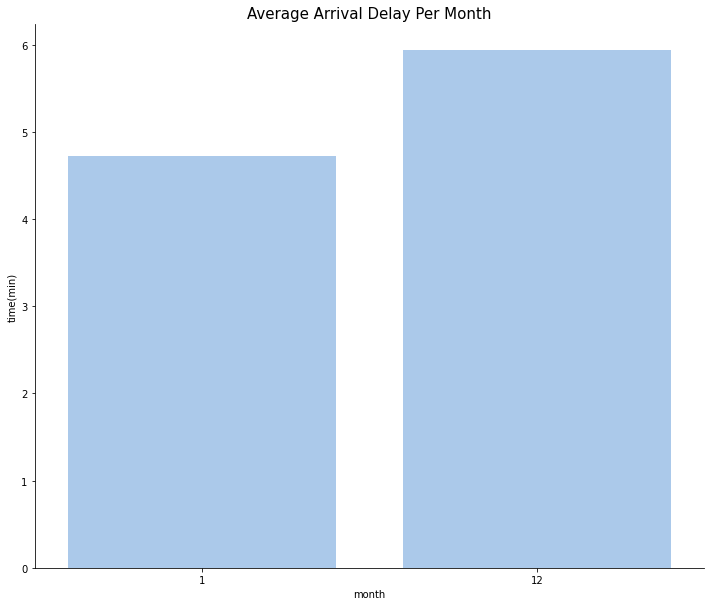

In [16]:
f, ax = plt.subplots(figsize=(12, 10))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="time(min)")
sns.barplot(x=average_delay_per_month.index, y=average_delay_per_month.values, color="b")
plt.title("Average Arrival Delay Per Month", size=15)
sns.despine()

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [581]:
df_flights_weather = pd.read_csv('data/flights_weather.csv')

In [583]:
weather = df_flights_weather[['fl_date','mkt_unique_carrier','mkt_carrier_fl_num','dep_delay','arr_delay','weather_condition']]

In [593]:
df_weather_vs_delay = weather[['weather_condition','arr_delay']].groupby('weather_condition').mean().reset_index()
df_weather_vs_delay

,weather_condition,arr_delay
0,Clear,2.371163
1,Cold,11.439456
2,Fog,5.890196
3,Hail,16.959229
4,Precipitation,21.814621
5,Rain,11.379445
6,Snow,18.062417
7,Storm,19.798544


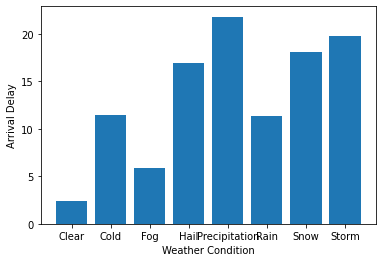

In [601]:
plt.bar(x = df_weather_vs_delay['weather_condition'],height=df_weather_vs_delay['arr_delay'])
plt.ylabel('Arrival Delay')
plt.xlabel('Weather Condition')
plt.show()

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [36]:
df_flights[['dep_time','taxi_in', 'taxi_out']].groupby('dep_time').mean()

,taxi_in,taxi_out
dep_time,,
1.0,7.149068,16.875776
2.0,6.286822,17.576923
3.0,6.755906,18.582677
4.0,7.424779,16.053097
5.0,7.047619,15.314286
...,...,...
2356.0,6.942105,16.263158
2357.0,8.443350,17.837438
2358.0,7.135870,17.597826


In [38]:
df_flights[['dep_time','arr_delay']].groupby('dep_time').describe()

arr_delay                                                         
             count       mean         std   min   25%   50%     75%     max
dep_time                                                                   
1.0          160.0  39.881250   80.836225 -59.0 -8.25   9.0   60.75   452.0
2.0          129.0  56.085271   79.854558 -40.0 -4.00  27.0  107.00   377.0
3.0          127.0  54.976378   72.161026 -41.0 -1.00  28.0   96.50   284.0
4.0          113.0  59.238938  107.130451 -36.0 -3.00  31.0   95.00   888.0
5.0          105.0  71.466667  110.102056 -31.0  4.00  39.0   93.00   653.0
...            ...        ...         ...   ...   ...   ...     ...     ...
2356.0       190.0  47.784211   86.681505 -34.0 -8.00   7.5   82.00   394.0
2357.0       202.0  44.089109   81.976225 -33.0 -9.00   7.5   85.25   357.0
2358.0       183.0  36.464481   68.407534 -34.0 -8.00   7.0   65.00   335.0
2359.0       184.0  49.347826  115.787816 -36.0 -6.00   9.5   66.50  1113.0
2400.0       105.0  63.276190  126.189075 -31.0 -6.00  30.0   90.00  1113.0

[1440 rows x 8 columns]

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [47]:
arr_delay_number = df_flights[df_flights['arr_delay']>0].shape[0]
dep_delay_number = df_flights[df_flights['dep_delay']>0].shape[0]

In [50]:
avg_percent_of_delays_caused_by_dep_delays = (arr_delay_number/dep_delay_number)*100
avg_percent_of_delays_caused_by_dep_delays

97.15578774716764

#### **Task 6**: How many states cover 50% of US air traffic? 

In [90]:
def statebreaker(city_state):
    """
    Params:  
    city_state - A string consisting of a city name and a state abbreviation
    
    Function:  
    Splits the string, extracting the state abbreviation.
    """
    split_list = city_state.split(',')
    return split_list[-1]

In [523]:
total_flights = df_flights.shape[0]
df_flights['state'] = df_flights['origin_city_name'].apply(statebreaker)
percent_per_states = df_flights['state'].value_counts()/total_flights*100
df_percent_per_states = pd.DataFrame(data=percent_per_states).sort_values(by='state', ascending=False)
df_percent_per_states

,state
CA,11.196735
TX,9.995913
FL,8.184030
IL,6.188882
GA,5.112469
NY,4.886831
NC,4.575768
CO,4.092128
WA,2.881145
PA,2.851642


In [524]:
df_percent_per_states.sort_values(by='state', ascending=False).head(7).sum()

state    50.140629
dtype: float64

In [149]:
print('Seven states cover 50% of US air traffic are: ', df_percent_per_states.sort_values(by='state', ascending=False).head(7).index.to_list())

Seven states cover 50% of US air traffic are:  [' CA', ' TX', ' FL', ' IL', ' GA', ' NY', ' NC']


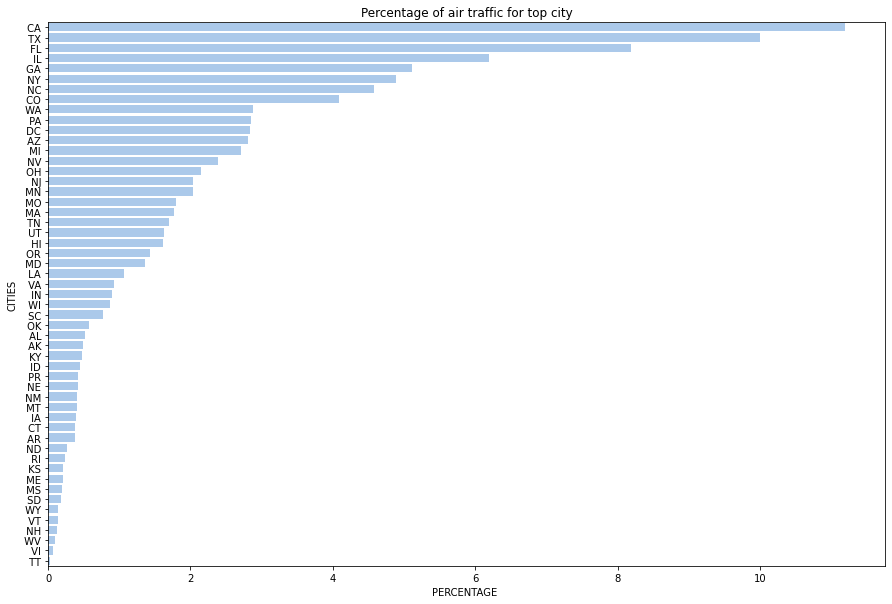

In [133]:
fig, axes = plt.subplots(figsize=(15,10))
sns.barplot(ax=axes, x=df_percent_per_states['state'], y=df_percent_per_states.index,color='b')
axes.set_title('Percentage of air traffic for top city')
axes.set_xlabel('PERCENTAGE ')
axes.set_ylabel('CITIES')
plt.show()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [83]:
df_flights['flight_time_change'] = df_flights['crs_elapsed_time'] - df_flights['actual_elapsed_time']

In [84]:
df_dep_delay = df_flights[df_flights['dep_delay'] > 0]
df_dep_delay.shape

(493845, 46)

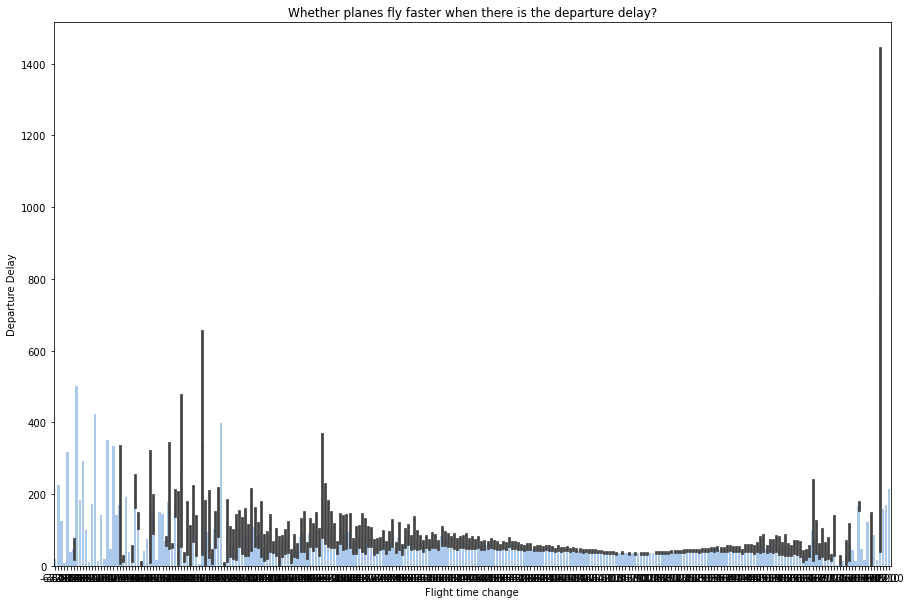

In [89]:
fig, axes = plt.subplots(figsize=(15,10))
sns.barplot(ax=axes, x=df_dep_delay['flight_time_change'], y=df_dep_delay['dep_delay'],color='b')
axes.set_title('Whether planes fly faster when there is the departure delay?')
axes.set_xlabel('Flight time change')
axes.set_ylabel('Departure Delay')
plt.show()

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [259]:
#Google: A short-haul flight is one of up to 3 hours in duration. Medium-haul flights take 3-6 hours. A long-haul flight runs for 6-12 hours

In [262]:
def get_haul_type(duration):
    if duration <=180:
        return 'SHORT'
    elif (duration >180) &  (duration<=360):
        return 'MEDIUM'
    else:
        return 'LONG'

In [267]:
df_flights['haul_type'] = df_flights['crs_elapsed_time'].apply(get_haul_type)

In [287]:
def get_hour(time):
    
    """
    Params - A time in format HHMM.0
    
    Returns  the two digits representing the hour of the flight
    """
    
    s = str(int(time))
    if len(s) <= 2:
        return 0
    else:
        return int(s[:-2])

In [353]:
df_flights['dep_hour'] = df_flights['dep_time'].apply(get_hour)

In [379]:
df_SHORT=df_flights[df_flights['haul_type']=='SHORT']
df_MEDIUM=df_flights[df_flights['haul_type']=='MEDIUM']
df_LONG=df_flights[df_flights['haul_type']=='LONG']

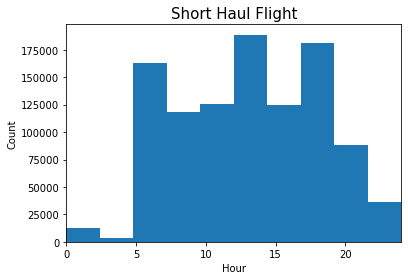

In [360]:
plt.hist(df_SHORT['dep_hour'])
plt.xlim(0, 24)
plt.title("Short Haul Flight", size=15)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

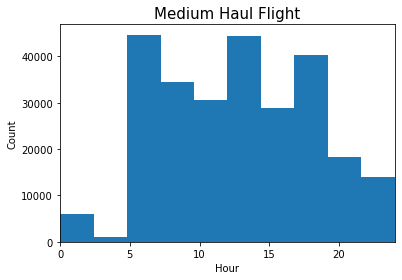

In [380]:
plt.hist(df_MEDIUM['dep_hour'])
plt.xlim(0, 24)
plt.title("Medium Haul Flight", size=15)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

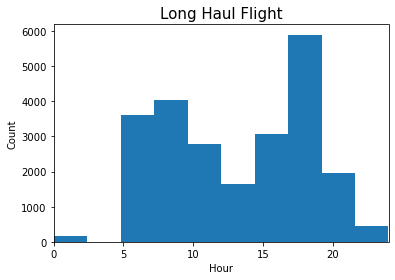

In [382]:
plt.hist(df_LONG['dep_hour'])
plt.xlim(0, 24)
plt.title("Long Haul Flight", size=15)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

#### Task 9: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

- Going to compare number of flights per airport vs the number of passengers per airport. Found that number of flights is correlated with number of passengers, however it is not perfect. Some of the airports ranked below number 5 in terms of total flights are not even in the top 10 when it comes to passenger count.

- The top 10 airports represent 32.4% of passenger traffic

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,59.0,59.0,2041400.0,8437.0,7858.0,17157.0,0.0,1105.0,10198.0,...,US,United States,6,612,1,2018,6,3,F,DU
1,1,59.0,59.0,2041400.0,8437.0,7817.0,9000.0,0.0,1428.0,12332.0,...,US,United States,6,612,1,2018,6,3,F,DU
2,2,59.0,59.0,2041400.0,8437.0,6128.0,1462.0,0.0,971.0,8769.0,...,US,United States,6,612,1,2018,6,2,F,DU
3,3,59.0,59.0,2041400.0,8437.0,6435.0,8237.0,0.0,583.0,5494.0,...,US,United States,6,612,1,2018,6,2,F,DU
4,4,59.0,59.0,1053740.0,4484.0,3898.0,0.0,0.0,1297.0,11442.0,...,US,United States,6,673,1,2018,9,3,F,DU


In [445]:
number_flights_per_airport = df_flights['origin'].value_counts() # + df_flights['dest'].value_counts()
top_10_airports = number_flights_per_airport.sort_values(ascending=False).head(10).index.to_list()
top_10_airports

['ORD', 'ATL', 'DFW', 'DEN', 'LAX', 'CLT', 'PHX', 'SEA', 'IAH', 'SFO']

In [473]:
number_passengers_per_airport = df_passengers['origin'].value_counts() #+ df_passengers['dest'].value_counts()
top_10_passengers_no = number_passengers_per_airport.sort_values(ascending=False).head(10).index.to_list()
top_10_passengers_no

['ORD', 'ATL', 'DEN', 'LAX', 'IAH', 'DTW', 'DFW', 'MSP', 'MIA', 'EWR']

In [447]:
airports_origin = pd.DataFrame(
    df_flights.groupby(['origin','origin_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)
airports_origin

,origin,origin_city_name,flight_count
0,ABE,"Allentown/Bethlehem/Easton, PA",880
1,ABI,"Abilene, TX",362
2,ABQ,"Albuquerque, NM",4657
3,ABR,"Aberdeen, SD",128
4,ABY,"Albany, GA",156
...,...,...,...
363,XWA,"Williston, ND",83
364,YAK,"Yakutat, AK",118
365,YKM,"Yakima, WA",244
366,YNG,"Youngstown/Warren, OH",2


In [448]:
airports_destination = pd.DataFrame(
    df_flights.groupby(['dest','dest_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)
airports_destination

,dest,dest_city_name,flight_count
0,ABE,"Allentown/Bethlehem/Easton, PA",876
1,ABI,"Abilene, TX",361
2,ABQ,"Albuquerque, NM",4657
3,ABR,"Aberdeen, SD",128
4,ABY,"Albany, GA",156
...,...,...,...
363,XWA,"Williston, ND",83
364,YAK,"Yakutat, AK",119
365,YKM,"Yakima, WA",244
366,YNG,"Youngstown/Warren, OH",2


In [480]:
airports_origin = airports_origin.sort_values(by='flight_count', ascending=False)[:10]
airports_destination = airports_destination.sort_values(by='flight_count', ascending=False)[:10]

In [479]:
passengers_airports_origin = pd.DataFrame(
                df_passengers.groupby(['origin','origin_city_name'])['passengers']
                .count().reset_index()
).rename({'passengers': 'total_passengers'}, axis=1)

passengers_airports_origin = passengers_airports_origin.sort_values(by='total_passengers', ascending=False)[:10]


passengers_airports_destination = pd.DataFrame(
    df_passengers.groupby(['dest','dest_city_name'])['passengers']
    .count().reset_index()
).rename({'passengers': 'total_passengers'}, axis=1)

passengers_airports_destination = passengers_airports_destination.sort_values(by='total_passengers', ascending=False)[:10]

In [481]:
passengers_airports_origin

,origin,origin_city_name,total_passengers
1618,ORD,"Chicago, IL",78217
170,ATL,"Atlanta, GA",65253
556,DEN,"Denver, CO",57153
1184,LAX,"Los Angeles, CA",52241
973,IAH,"Houston, TX",46173
614,DTW,"Detroit, MI",43928
558,DFW,"Dallas/Fort Worth, TX",43244
1416,MSP,"Minneapolis, MN",43207
1350,MIA,"Miami, FL",42800
697,EWR,"Newark, NJ",41148


In [482]:
passengers_airports_destination

,dest,dest_city_name,total_passengers
1672,ORD,"Chicago, IL",77502
178,ATL,"Atlanta, GA",65739
569,DEN,"Denver, CO",57148
1221,LAX,"Los Angeles, CA",50763
1002,IAH,"Houston, TX",46303
571,DFW,"Dallas/Fort Worth, TX",44279
629,DTW,"Detroit, MI",43604
1467,MSP,"Minneapolis, MN",43503
719,EWR,"Newark, NJ",41527
1397,MIA,"Miami, FL",40683


In [486]:
merge = pd.merge(airports_origin,passengers_airports_origin,how = "outer", on = "origin")
merge['percent'] = merge['total_passengers']/df_passengers.shape[0]*100
merge

,origin,origin_city_name_x,flight_count,origin_city_name_y,total_passengers,percent
0,ORD,"Chicago, IL",64415.0,"Chicago, IL",78217.0,3.327679
1,ATL,"Atlanta, GA",63804.0,"Atlanta, GA",65253.0,2.776136
2,DFW,"Dallas/Fort Worth, TX",48924.0,"Dallas/Fort Worth, TX",43244.0,1.839781
3,DEN,"Denver, CO",46080.0,"Denver, CO",57153.0,2.431528
4,LAX,"Los Angeles, CA",43507.0,"Los Angeles, CA",52241.0,2.222551
5,CLT,"Charlotte, NC",42194.0,NaN,NaN,NaN
6,PHX,"Phoenix, AZ",31767.0,NaN,NaN,NaN
7,SEA,"Seattle, WA",31534.0,NaN,NaN,NaN
8,IAH,"Houston, TX",30552.0,"Houston, TX",46173.0,1.964393
9,SFO,"San Francisco, CA",30213.0,NaN,NaN,NaN


In [487]:
merge['percent'].sum()

21.840657529024714

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [564]:
#average delay per air carrier (monthly delay is sum of all delays in 1 month)
df_avg_delay = pd.DataFrame(df_flights[['mkt_carrier','arr_delay']].groupby(['mkt_carrier']).mean().reset_index())
df_avg_delay.sort_values('arr_delay', ascending = False)

,mkt_carrier,arr_delay
2,B6,15.865521
5,G4,10.384496
8,UA,8.941272
4,F9,7.038597
0,AA,6.438756
10,WN,4.720215
1,AS,3.413912
7,NK,2.900697
9,VX,2.871823
6,HA,2.186498


In [562]:
#distance covered by different air carriers
df_distance = pd.DataFrame(df_flights[['mkt_carrier','distance']].groupby(['mkt_carrier']).sum().reset_index())
df_distance.sort_values('distance', ascending = False)

,mkt_carrier,distance
0,AA,246943103.0
8,UA,208801133.0
3,DL,197561946.0
10,WN,174095964.0
1,AS,70453892.0
2,B6,56660836.0
7,NK,33562596.0
4,F9,22805332.0
5,G4,15826547.0
6,HA,10792504.0


In [566]:
#number of passengers that were carried by different air carriers
df_number_passengers_per_carrier = pd.DataFrame(df_passengers['unique_carrier'].value_counts().reset_index()).rename(columns={'index':'mkt_carrier','unique_carrier':'total_passengers'})
df_number_passengers_per_carrier

,mkt_carrier,total_passengers
0,DL,215864
1,UA,188250
2,WN,183181
3,AA,133516
4,OO,128046
...,...,...
372,0GQ,4
373,JVQ,4
374,HYP,4
375,X7,4


In [567]:
#Find out total fuel comsumption per air carrier
df_1 = df_fuel_comsumption[['unique_carrier', 'total_cost']].groupby('unique_carrier').sum().reset_index().sort_values('total_cost', ascending=False)
df_cost_per_carrier = df_1.rename(columns={'unique_carrier':'mkt_carrier'})
df_cost_per_carrier

,mkt_carrier,total_cost
19,DL,3.286616e+10
14,AA,2.853022e+10
49,UA,2.786589e+10
55,WN,1.816020e+10
24,FX,9.372142e+09
...,...,...
12,9E,0.000000e+00
40,OH,0.000000e+00
18,CP,0.000000e+00
36,MQ,0.000000e+00


In [579]:
#calculate fuel comsumption per customer
merge_ = df_cost_per_carrier.merge(df_number_passengers_per_carrier,how='outer', on='mkt_carrier')
merge_['avg_cost_per_pas'] = merge_['total_cost']/merge_['total_passengers']
merge_.sort_values('avg_cost_per_pas', ascending = False)

,mkt_carrier,total_cost,total_passengers,avg_cost_per_pas
13,PO,1.521574e+09,2956,514740.736806
15,9S,8.797413e+08,1920,458198.608854
10,HA,2.119514e+09,5501,385296.046537
8,5Y,4.400130e+09,15538,283185.088428
21,X9,4.157714e+08,1901,218711.957917
...,...,...,...,...
372,0GQ,NaN,4,NaN
373,JVQ,NaN,4,NaN
374,HYP,NaN,4,NaN
375,X7,NaN,4,NaN


In [578]:
merge_final = merge_.merge(df_distance,how='outer', on='mkt_carrier')
merge_final['avg_cost_per_pas_per_km'] = merge_final['total_cost']/merge_final['total_passengers']/merge_final['distance']
merge_final.sort_values('avg_cost_per_pas_per_km', ascending=False)

,mkt_carrier,total_cost,total_passengers,distance,avg_cost_per_pas_per_km
16,VX,8.768577e+08,4613,4084608.0,0.046537
10,HA,2.119514e+09,5501,10792504.0,0.035700
5,B6,7.075583e+09,43686,56660836.0,0.002858
9,NK,3.211993e+09,41762,33562596.0,0.002292
11,F9,1.929598e+09,42343,22805332.0,0.001998
...,...,...,...,...,...
372,0GQ,NaN,4,NaN,NaN
373,JVQ,NaN,4,NaN,NaN
374,HYP,NaN,4,NaN,NaN
375,X7,NaN,4,NaN,NaN
